# Scraping Data from a Static News Website with BeautifulSoup

## Detikcom

In [1]:
# Import libraries
import requests  # For making HTTP requests
from bs4 import BeautifulSoup  # For parsing HTML and XML documents
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

# Filter out warning messages to improve code readability
import warnings
warnings.filterwarnings('ignore')  # Ignore warning messages

As an example, let's attempt to perform content scraping from detikcom. Before doing so, it is necessary to visit the detikcom website to understand the URL structure that we intend to scrape. 

This involves inspecting the website to identify the specific URLs containing the news content we want to extract. This preliminary step allows us to familiarize ourselves with the website's layout and ensures that our scraping process is well-informed and targeted.

In [2]:
url_detik = 'https://www.detik.com/tag/anies-baswedan/?sortby=time&page=1'

# Making a get request 
response = requests.get(url_detik)

In [3]:
# print request status_code
response.status_code

200

The **response.status_code** provides a numerical indication of the HTTP status (200 for OK, 404 for Not Found). For additional information on HTTP status codes, refer to [this link](https://www.geeksforgeeks.org/http-status-codes-successful-responses/)

In [4]:
# Create a BeautifulSoup object to parse the HTML content of the response
soup = BeautifulSoup(response.content, "html.parser")

Next, we will proceed to extract the specific portions we desire. 

For instance, if our goal is to retrieve the title from each news content, we will target the elements within the HTML structure marked with the `<h>` tag and class `"title"` as illustrated in the image below. (note: you can inspect a website by using the keyboard shortcut `Ctrl+Shift+C`)

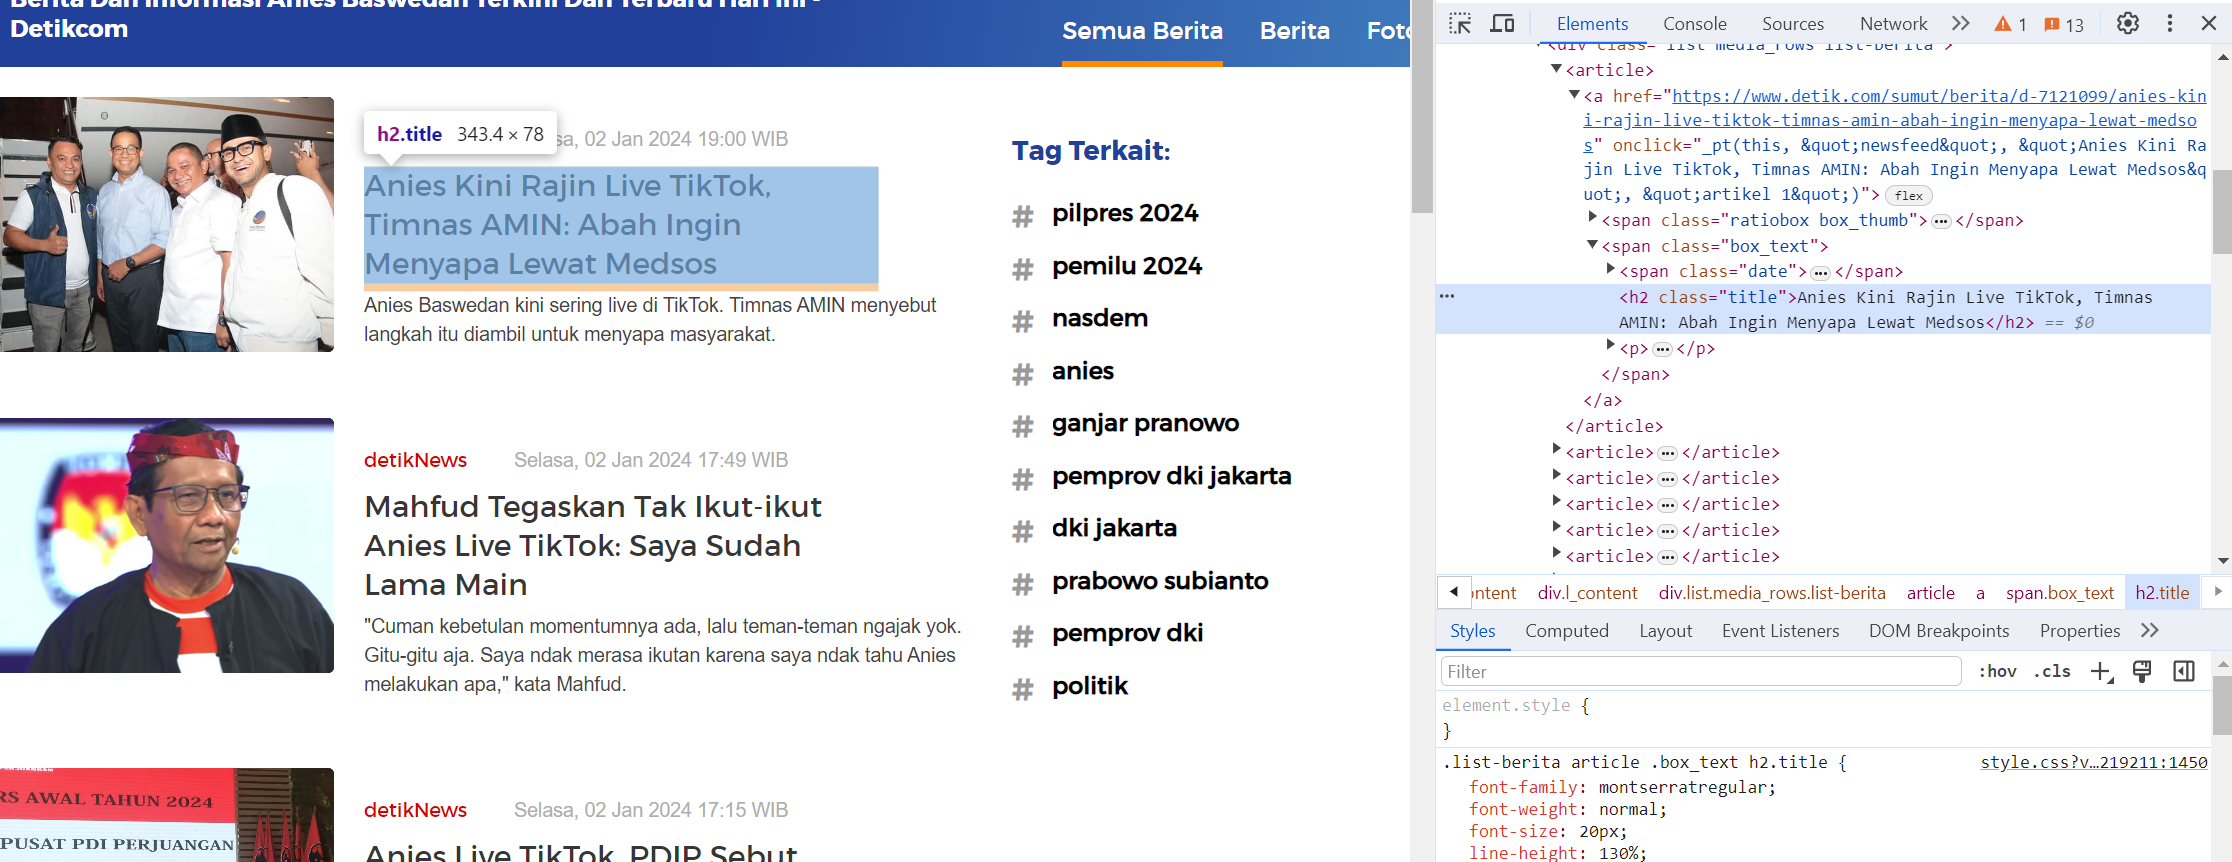

In [5]:
# Find all HTML elements with the tag <h2> and class 'title' within the parsed HTML content
tag_for_titles = soup.find_all('h2', 'title')
tag_for_titles

[<h2 class="title">Tentang Istano Basa Pagaruyung, Lokasi Awal Kegiatan Desak Anies di Sumbar</h2>,
 <h2 class="title">Respons Anies soal 'Desak Anies' Batal di Istano Basa Pagaruyung</h2>,
 <h2 class="title">Penjelasan Bupati Tanah Datar Larang Kegiatan Desak Anies di Istana Pagaruyung</h2>,
 <h2 class="title">Kampanye di Tanah Datar, Anies Bahas Usaha-Lapangan Kerja</h2>,
 <h2 class="title">Anies Minta Bansos Tak Diklaim Bantuan Pribadi: Itu Uang Rakyat</h2>,
 <h2 class="title">Anies soal Wapres Bukan Ban Serep: Pasangan Itu Setara</h2>,
 <h2 class="title">Anies: Bansos Dibeli dari Uang Pajak, Jangan Diklaim Atas Nama Pribadi</h2>,
 <h2 class="title">Tanggapan Santai Anies soal Sejumlah Oknum Satpol PP di Garut Dukung Gibran</h2>,
 <h2 class="title">Anies: Lebih Baik Bangun Istana di Nusantara atau Jalan di Kampung?</h2>,
 <h2 class="title">Anies Janji Reaktivitas Jalur Kereta Api di Sumbar yang Telah Lama Vakum</h2>]

In [6]:
# Extract title text
titles = [i.text for i in tag_for_titles]
titles

['Tentang Istano Basa Pagaruyung, Lokasi Awal Kegiatan Desak Anies di Sumbar',
 "Respons Anies soal 'Desak Anies' Batal di Istano Basa Pagaruyung",
 'Penjelasan Bupati Tanah Datar Larang Kegiatan Desak Anies di Istana Pagaruyung',
 'Kampanye di Tanah Datar, Anies Bahas Usaha-Lapangan Kerja',
 'Anies Minta Bansos Tak Diklaim Bantuan Pribadi: Itu Uang Rakyat',
 'Anies soal Wapres Bukan Ban Serep: Pasangan Itu Setara',
 'Anies: Bansos Dibeli dari Uang Pajak, Jangan Diklaim Atas Nama Pribadi',
 'Tanggapan Santai Anies soal Sejumlah Oknum Satpol PP di Garut Dukung Gibran',
 'Anies: Lebih Baik Bangun Istana di Nusantara atau Jalan di Kampung?',
 'Anies Janji Reaktivitas Jalur Kereta Api di Sumbar yang Telah Lama Vakum']

#### Lexicon Based Sentiment Analysis

To make it more engaging, we can perform sentiment analysis using a lexicon-based approach. 

In this case, we will utilize TextBlob, a natural language processing library in Python.By utilizing TextBlob, there is no need for manual labeling or building a machine learning model from scratch. To gain a deeper understanding of how TextBlob works, please visit the following [link](https://pypi.org/project/textblob/)

In [7]:
from textblob import TextBlob

In [8]:
def textblob_score(text):
    """
    The `text_en.sentiment` method provides two values: polarity and subjectivity.
    - Polarity ranges from -1.0 to 1.0, indicating the sentiment's negativity to positivity.
    - Subjectivity ranges from 0.0 to 1.0, where 0.0 is very factual, and 1.0 is very opinion-based.
    In our case, we focus on the polarity score to understand the sentiment's direction.
    """
    blob_object = TextBlob(text) # get texblob object
    text_en = blob_object.translate(from_lang='id', to='en') # translate into english
    score = text_en.sentiment.polarity # extract polarity score
    return score

In [9]:
# TSample text
sample_text = 'TPN Bantah Mahfud Live TikTok Terinspirasi Anies'

textblob_score(sample_text)

0.13636363636363635

Now, let's delve deeper into scraping. We'll extract multiple pieces of information from each news content simultaneously

In [11]:
# Create function to scrape data and get the polarity score 
def scrape_news(start_date="2024-01-01", keyword="pilpres 2024"):
    start_date = pd.Timestamp(start_date)
    keyword_url = keyword.replace(' ','-')
    news = []
    
    # Initialize page number
    x = 1
    
    # Loop for scraping pages until the start_date is reached
    while True:
        # Construct the URL for the current page
        url_detik = f'https://www.detik.com/tag/{keyword_url}/?sortby=time&page={x}'
        print(f'scrape page:{x}')
        
        # Make a request to the URL and parse the content
        page = requests.get(url_detik)
        soup = BeautifulSoup(page.content, "html.parser")

        # Find all articles on the page
        articles = soup.find_all('article')
        for i in articles:
            # Extract date, URL, and title from the article
            date = i.find('span','date').text.split(',')[1].replace('Des','Dec')
            date = pd.to_datetime(date)
            url = i.find('a').get('href')
            title = i.find('h2','title').text
            # Calculate sentiment score using textblob_score function
            polarity = textblob_score(title)

            # Break the loop if the start_date is greater than the current article's date
            if start_date>date:
                break

            news.append({
                'keyword':keyword,
                'platform':'detikcom',
                'date':date,
                'url':url,
                'title':title,
                'score':polarity
            })
        # Break the main loop if the start_date is greater than the current article's date or current page is 25
        if (start_date>date) or (x==25):
            break

        x += 1 # Move to the next page
        
    return news

#### Presidential candidate 1

In [12]:
keyword = 'anies baswedan'
start = "2023-11-28" # This marks the beginning of the campaign period for the 2024 elections.
anies_news = scrape_news(start_date=start, keyword=keyword)

scrape page:1
scrape page:2
scrape page:3
scrape page:4
scrape page:5
scrape page:6
scrape page:7
scrape page:8
scrape page:9
scrape page:10
scrape page:11
scrape page:12
scrape page:13
scrape page:14
scrape page:15
scrape page:16
scrape page:17
scrape page:18
scrape page:19
scrape page:20
scrape page:21
scrape page:22
scrape page:23
scrape page:24
scrape page:25


In [13]:
df_anies = pd.DataFrame(anies_news)

# print 5 first data of df_anies
df_anies.head()

,keyword,platform,date,url,title,score
0,anies baswedan,detikcom,2024-01-03 21:30:00,https://www.detik.com/sumut/berita/d-7122504/t...,"Tentang Istano Basa Pagaruyung, Lokasi Awal Ke...",0.0
1,anies baswedan,detikcom,2024-01-03 19:30:00,https://www.detik.com/sumut/berita/d-7123035/r...,Respons Anies soal 'Desak Anies' Batal di Ista...,0.0
2,anies baswedan,detikcom,2024-01-03 18:15:00,https://www.detik.com/sumut/berita/d-7122672/p...,Penjelasan Bupati Tanah Datar Larang Kegiatan ...,0.0
3,anies baswedan,detikcom,2024-01-03 17:16:00,https://news.detik.com/foto-news/d-7122804/kam...,"Kampanye di Tanah Datar, Anies Bahas Usaha-Lap...",0.0
4,anies baswedan,detikcom,2024-01-03 17:10:00,https://www.detik.com/sumut/berita/d-7122744/a...,Anies Minta Bansos Tak Diklaim Bantuan Pribadi...,0.0


#### Presidential candidate 2

In [14]:
keyword = 'prabowo subianto'
start = "2023-11-28"
prabowo_news = scrape_news(start_date=start, keyword=keyword)

scrape page:1
scrape page:2
scrape page:3
scrape page:4
scrape page:5
scrape page:6
scrape page:7
scrape page:8
scrape page:9
scrape page:10
scrape page:11
scrape page:12
scrape page:13
scrape page:14
scrape page:15
scrape page:16
scrape page:17
scrape page:18
scrape page:19
scrape page:20
scrape page:21
scrape page:22
scrape page:23
scrape page:24
scrape page:25


#### Presidential candidate 3

In [15]:
keyword = 'ganjar pranowo'
start = "2023-11-28"
ganjar_news = scrape_news(start_date=start, keyword=keyword)

scrape page:1
scrape page:2
scrape page:3
scrape page:4
scrape page:5
scrape page:6
scrape page:7
scrape page:8
scrape page:9
scrape page:10
scrape page:11
scrape page:12
scrape page:13
scrape page:14
scrape page:15
scrape page:16
scrape page:17
scrape page:18
scrape page:19
scrape page:20
scrape page:21
scrape page:22
scrape page:23
scrape page:24
scrape page:25


In [16]:
df_prabowo = pd.DataFrame(prabowo_news)
df_ganjar = pd.DataFrame(ganjar_news)

In [17]:
def content_info(df):
    # Make a copy of the DataFrame to avoid modifying the original
    df = df.copy()

    # Extract keyword from the first row of the 'query' column
    keyword = df.loc[0, 'keyword']

    # Create new columns for positive, neutral, and negative sentiment based on polarity values
    df['pos'] = np.where(df['score'] > 0, 1, 0)
    df['neu'] = np.where(df['score'] == 0, 1, 0)
    df['neg'] = np.where(df['score'] < 0, 1, 0)

    # Display summary information about the dataset
    print(f'Total data for keyword "{keyword}": {df.shape[0]}')
    print(f'With {df["pos"].sum()} positive sentiments, {df["neu"].sum()} neutral, and {df["neg"].sum()} negative.')

**Now we can check the scraping result for each keyword from detikcom**

In [18]:
content_info(df_anies)

Total data for keyword "anies baswedan": 248
With 74 positive sentiments, 152 neutral, and 22 negative.


In [19]:
content_info(df_prabowo)

Total data for keyword "prabowo subianto": 248
With 84 positive sentiments, 139 neutral, and 25 negative.


In [20]:
content_info(df_ganjar)

Total data for keyword "ganjar pranowo": 248
With 79 positive sentiments, 142 neutral, and 27 negative.


### Make a vizualization

In [21]:
from pathlib import Path

PARENT_DIR = Path().resolve().parent
print(PARENT_DIR)

C:\Users\Nusatrip\Repo\news-scraper


In [22]:
def data_viz(df):
    # Make a copy of the DataFrame to avoid modifying the original
    df = df.copy()

    # Create new columns for positive, neutral, and negative sentiment based on polarity values
    df['pos'] = np.where(df['score'] > 0, 1, 0)
    df['neu'] = np.where(df['score'] == 0, 1, 0)
    df['neg'] = np.where(df['score'] < 0, 1, 0)

    # Group by keyword and calculate the sum of positive, neutral, and negative sentiments
    tmp = df.groupby(['keyword'])[['pos', 'neu', 'neg']].sum().reset_index()

    # Prepare data for plotting
    key = list(tmp['keyword'].unique())
    df_map = tmp[['pos', 'neu', 'neg']].to_dict(orient='list')

    # Plotting
    x = np.arange(len(key))
    width = 0.25
    multiplier = 0

    fig, ax = plt.subplots()

    for attribute, measurement in df_map.items():
        offset = width * multiplier
        color = 'green' if attribute == 'pos' else 'lightblue' if attribute == 'neu' else 'red'
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add labels, title, and legend
    ax.set_ylabel('Count')
    ax.set_title(f'Sentiment Analysis for News on Detikcom')
    ax.set_xticks(x + width * (multiplier - 1) / 2)
    ax.set_xticklabels(key, ha='center')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.savefig(PARENT_DIR / 'save_img/sentiment_{}.png'.format(df.loc[0,'platform']), bbox_inches='tight')

    plt.show()

In [23]:
# concat all dataframe
df_all = pd.concat([df_anies,df_prabowo,df_ganjar]).reset_index(drop=True)

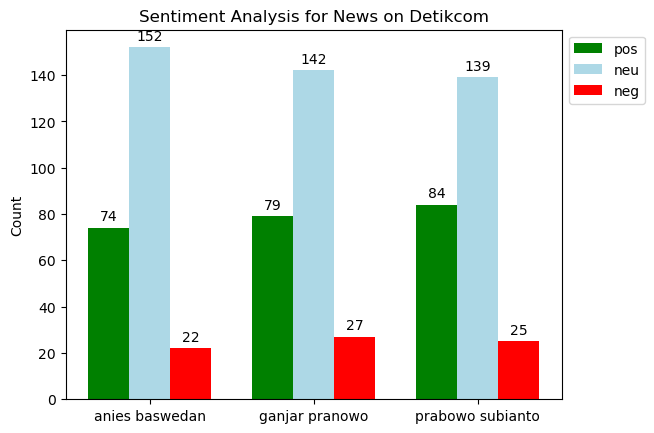

In [24]:
data_viz(df_all)

### WordCloud

In [25]:
# Start with loading all necessary libraries
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [26]:
# Create stopword list
stopwords = {
    'di','ke','untuk','dari','dan','ini','itu','juga','saat','yang','ada','karena','tak',
    'bukan','tidak','ini','itu','jika'
}

In [27]:
def wc(df, img_path):
    img_path = PARENT_DIR / img_path
    text = " ".join([i for i in df.title])
    print ("There are {} words from news title with keyword {}.".format(len(text),df.loc[0,'keyword']))
    
    mask = np.array(Image.open(img_path))
    # Generate a word cloud image
    wordcloud_por = WordCloud(stopwords=stopwords, background_color='white', max_words=5000, mask=mask).generate(text)

    # create coloring from image
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[7,7])
    plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.savefig(PARENT_DIR / f'save_img/{df.loc[0,"keyword"]}.jpg')
    plt.show()

There are 16347 words from news title with keyword anies baswedan.


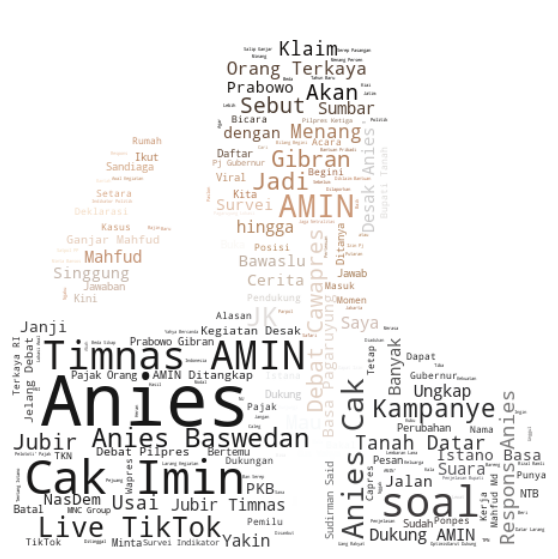

In [28]:
wc(df_anies, img_path='img/anies.jpg')

There are 16907 words from news title with keyword prabowo subianto.


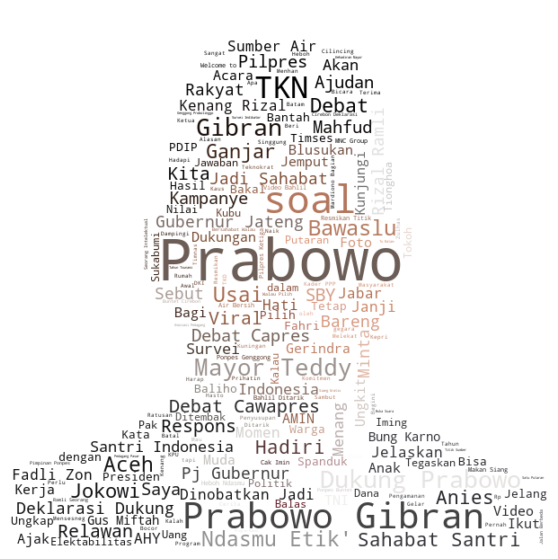

In [29]:
wc(df_prabowo, img_path='img/prabowo.jpg')

There are 16759 words from news title with keyword ganjar pranowo.


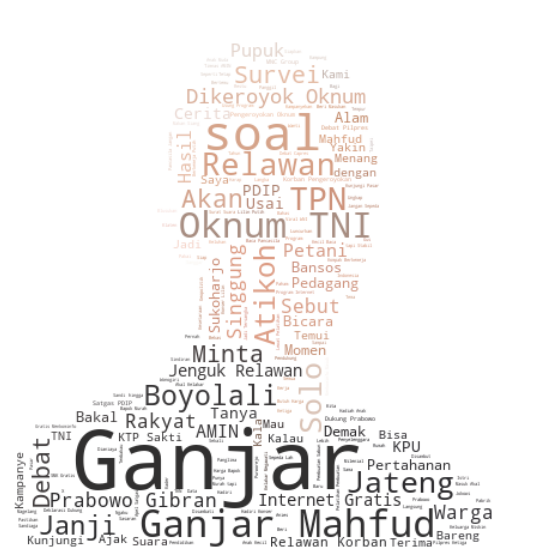

In [30]:
wc(df_ganjar, img_path='img/ganjar.jpg')

In [31]:
df_all

,keyword,platform,date,url,title,score
0,anies baswedan,detikcom,2024-01-03 21:30:00,https://www.detik.com/sumut/berita/d-7122504/t...,"Tentang Istano Basa Pagaruyung, Lokasi Awal Ke...",0.000
1,anies baswedan,detikcom,2024-01-03 19:30:00,https://www.detik.com/sumut/berita/d-7123035/r...,Respons Anies soal 'Desak Anies' Batal di Ista...,0.000
2,anies baswedan,detikcom,2024-01-03 18:15:00,https://www.detik.com/sumut/berita/d-7122672/p...,Penjelasan Bupati Tanah Datar Larang Kegiatan ...,0.000
3,anies baswedan,detikcom,2024-01-03 17:16:00,https://news.detik.com/foto-news/d-7122804/kam...,"Kampanye di Tanah Datar, Anies Bahas Usaha-Lap...",0.000
4,anies baswedan,detikcom,2024-01-03 17:10:00,https://www.detik.com/sumut/berita/d-7122744/a...,Anies Minta Bansos Tak Diklaim Bantuan Pribadi...,0.000
...,...,...,...,...,...,...
739,ganjar pranowo,detikcom,2024-01-03 20:30:00,https://finance.detik.com/berita-ekonomi-bisni...,"Ganjar Usung Program Internet Gratis, Menkomin...",0.400
740,ganjar pranowo,detikcom,2024-01-03 20:10:00,https://news.detik.com/pemilu/d-7123097/kelaka...,Kelakar Megawati soal Hadiah Anak Kecil Baca P...,-0.250
741,ganjar pranowo,detikcom,2024-01-03 19:44:00,https://news.detik.com/pemilu/d-7123069/tgb-so...,TGB soal Debat Pilpres Ketiga: MNC Group Akan ...,0.065
742,ganjar pranowo,detikcom,2024-01-03 19:15:00,https://news.detik.com/pemilu/d-7123023/atikoh...,Atikoh Sebut Warga & Pedagang Tak Butuh Harga ...,0.400


In [32]:
# df_all.to_csv(PARENT_DIR / 'deployment_script/data/data.csv', index=False)

## Liputan6

In [87]:
def liputan6_news(start_date="2024-01-01", keyword="pilpres 2024"):
    start_date = pd.Timestamp(start_date)
    keyword_url = keyword.replace(' ','-')
    news = []
    
    x = 1
    
    while True:
        url_liputan6 = f'https://www.liputan6.com/tag/{keyword_url}?page={x}'
        print(f'scrape page:{x}')
        
        page = requests.get(url_liputan6)
        soup = BeautifulSoup(page.content, "html.parser")

        articles = soup.find_all('header','articles--iridescent-list--text-item__header')
        for i in articles:
            date = i.find('time','articles--iridescent-list--text-item__time timeago').text.replace('Des','Dec')
            date = pd.to_datetime(date)
            title = i.find('a','ui--a articles--iridescent-list--text-item__title-link').get('title')
            url = i.find('a','ui--a articles--iridescent-list--text-item__title-link').get('href')
            polarity = textblob_score(title)

            if start_date>date:
                break

            news.append({
                'keyword':keyword,
                'platform':'liputan6',
                'date':date,
                'url':url,
                'title':title,
                'score':polarity
            })
            
        if (start_date>date) or (x==25):
            break

        x += 1 
        
    return news

In [ ]:
anies_news = liputan6_news(keyword='anies baswedan')
df_anies = pd.DataFrame(anies_news)
df_anies.head()

scrape page:1
scrape page:2
scrape page:3


,keyword,platform,date,url,title,score
0,anies baswedan,liputan6,2024-01-07 06:11:00,https://www.liputan6.com/pemilu/read/5498964/j...,"Jelang Debat Capres, Cak Imin: Semoga Mas Anie...",0.400000
1,anies baswedan,liputan6,2024-01-06 21:19:00,https://www.liputan6.com/news/read/5498871/usa...,"Usai Disentil Anies, Pemprov DKI Sebut Warga K...",0.285714
2,anies baswedan,liputan6,2024-01-06 18:00:00,https://www.liputan6.com/cek-fakta/read/549873...,"Anies Baswedan Diterpa Hoaks, Simak Daftarnya",0.000000
3,anies baswedan,liputan6,2024-01-06 17:30:00,https://www.liputan6.com/global/read/5498451/i...,"Ini 5 Isu Geopolitik yang Wajib Dibahas Anies,...",0.000000
4,anies baswedan,liputan6,2024-01-06 15:00:00,https://www.liputan6.com/bisnis/read/5498642/d...,"Debat Capres Ketiga, Ekonom Minta Ketahanan Pa...",0.000000


## Kompas

In [136]:
url_kompas = 'https://www.kompas.com/tag/anies-baswedan'

page = requests.get(url_kompas)
soup = BeautifulSoup(page.content, "html.parser")
articles = soup.find_all('div','article__list clearfix')

In [141]:
articles[0].find('a', 'article__link').text
articles[0].find('a', 'article__link').get('href')
articles[0].find('div','article__date').text

'06/01/2024, 06:51 WIB'

In [143]:
def kompas_news(start_date="2024-01-01", keyword="pilpres 2024"):
    start_date = pd.Timestamp(start_date)
    keyword_url = keyword.replace(' ','-')
    news = []
    
    x = 1
    
    while True:
        url_kompas = f'https://www.kompas.com/tag/{keyword_url}?page={x}'
        print(f'scrape page:{x}')
        
        page = requests.get(url_kompas)
        soup = BeautifulSoup(page.content, "html.parser")

        articles = soup.find_all('div','article__list clearfix')
        for i in articles:
            title = i.find('a', 'article__link').text
            url = i.find('a', 'article__link').get('href')
            date = i.find('div','article__date').text.replace('Des','Dec')
            date = pd.to_datetime(date)
            polarity = textblob_score(title)

            if start_date>date:
                break

            news.append({
                'keyword':keyword,
                'platform':'kompas',
                'date':date,
                'url':url,
                'title':title,
                'score':polarity
            })
            
        if (start_date>date) or (x==25):
            break

        x += 1 
        
    return news

In [144]:
anies_news = kompas_news(keyword='anies baswedan')
df_anies = pd.DataFrame(anies_news)
df_anies.head()

scrape page:1
scrape page:2
scrape page:3


,keyword,platform,date,url,title,score
0,anies baswedan,liputan6,2024-06-01 06:51:00,http://nasional.kompas.com/read/2024/01/06/065...,Anies: Pilpres Bukan Memilih Foto untuk Dipasa...,0.000000
1,anies baswedan,liputan6,2024-06-01 06:14:00,http://nasional.kompas.com/read/2024/01/06/061...,Senang Metode Live TikTok Diikuti Ganjar-Mahfu...,0.478788
2,anies baswedan,liputan6,2024-06-01 02:53:00,https://video.kompas.com/watch/1143235/anies-t...,Anies Tanggapi Santai Jokowi Bertemu Prabowo J...,-0.500000
3,anies baswedan,liputan6,2024-06-01 02:42:00,https://video.kompas.com/watch/1143231/sahroni...,"Sahroni Cerita Mimpi Jadi Presiden, Anies: Kal...",0.333333
4,anies baswedan,liputan6,2024-06-01 00:40:00,https://video.kompas.com/watch/1143124/kpu-min...,KPU Minta Tiap Paslon Jelaskan Singkatan Saat ...,0.000000


In [167]:
from pandas import Timestamp

In [184]:
data = pd.DataFrame([])
try:
    date = data['date'].max()
except KeyError:
    date = "2024-01-01"
    
print(date)

2024-01-01


In [177]:
data = []
for result in results:
    data+= result

In [179]:
pd.DataFrame(data)

,keyword,platform,date,url,title,score
0,anies baswedan,cnn,2024-01-08 13:22:06,https://www.cnnindonesia.com/nasional/20240108...,TKN soal Tak Ada Jabat Tangan Prabowo-Anies: K...,-0.4
1,anies baswedan,cnn,2024-01-08 12:30:41,https://www.cnnindonesia.com/nasional/20240108...,Mutya Hafid Puji Prabowo Tak Terpancing Buka D...,0.0
2,anies baswedan,kompas,2024-01-08 11:12:00,http://nasional.kompas.com/read/2024/01/08/111...,Presiden PKS: Visi Anies Bawa Indonesia Jadi P...,0.0
3,anies baswedan,kompas,2024-01-08 11:07:00,http://nasional.kompas.com/read/2024/01/08/110...,"Kala Anies, Prabowo, dan Ganjar Bicara Pengelo...",0.0


## CNN Indonesia

In [96]:
url_cnn = 'https://www.cnnindonesia.com/tag/anies-baswedan/2'

# Making a get request 
response = requests.get(url_tempo)

In [97]:
response

<Response [200]>

In [119]:
page = requests.get(url_cnn)
soup = BeautifulSoup(page.content, 'html.parser')

In [113]:
title = article.find('h2').text
url = article.find('a').get('href')
date = url.split('/')[4].split('-')[0]
date = pd.to_datetime(date)

In [112]:
article.find('h2').text

'8 Akses Masuk GBK Ditutup Saat Debat Ketiga Pilpres Hari Ini'

In [122]:
def cnn_news(start_date="2024-01-01", keyword="pilpres 2024"):
    start_date = pd.Timestamp(start_date)
    keyword_url = keyword.replace(' ','-')
    news = []
    
    x = 1

    while True:
        url_cnn = f'https://www.cnnindonesia.com/tag/{keyword_url}/{x}'
        print(f'scrape page:{x}')
        
        page = requests.get(url_cnn)
        soup = BeautifulSoup(page.content, "html.parser")

        articles = soup.find_all('article')
        for i in articles:
            title = i.find('h2').text
            url = i.find('a').get('href')
            date = url.split('/')[4].split('-')[0]
            date = pd.to_datetime(date)
            polarity = textblob_score(title)

            if start_date>date:
                break

            news.append({
                'keyword':keyword,
                'platform':'cnn',
                'date':date,
                'url':url,
                'title':title,
                'score':polarity
            })
            
        if (start_date>date) or (x==25):
            break

        x += 1
        
    return news

In [124]:
anies_news = cnn_news(keyword='anies baswedan')
df_anies = pd.DataFrame(anies_news)
df_anies.head()

scrape page:1


,keyword,platform,date,url,title,score
0,anies baswedan,cnn,2024-01-07 05:49:54,https://www.cnnindonesia.com/nasional/20240107...,3 Ribu Aparat Gabungan Dikerahkan Jaga Debat K...,0.00
1,anies baswedan,cnn,2024-01-07 04:00:15,https://www.cnnindonesia.com/nasional/20240107...,8 Akses Masuk GBK Ditutup Saat Debat Ketiga Pi...,-0.05
2,anies baswedan,cnn,2024-01-06 10:01:19,https://www.cnnindonesia.com/nasional/20240106...,FOTO: Larangan Pemasangan Alat Peraga Kampanye...,0.00
3,anies baswedan,cnn,2024-01-07 06:53:59,https://www.cnnindonesia.com/internasional/202...,Palestina Kuburkan Kembali Jasad yang Digali d...,0.00
4,anies baswedan,cnn,2024-01-06 11:58:23,https://www.cnnindonesia.com/internasional/202...,FOTO: Deret Mobil Terjebak Badai Salju Swedia,0.00


In [125]:
df_anies

,keyword,platform,date,url,title,score
0,anies baswedan,cnn,2024-01-07 05:49:54,https://www.cnnindonesia.com/nasional/20240107...,3 Ribu Aparat Gabungan Dikerahkan Jaga Debat K...,0.0000
1,anies baswedan,cnn,2024-01-07 04:00:15,https://www.cnnindonesia.com/nasional/20240107...,8 Akses Masuk GBK Ditutup Saat Debat Ketiga Pi...,-0.0500
2,anies baswedan,cnn,2024-01-06 10:01:19,https://www.cnnindonesia.com/nasional/20240106...,FOTO: Larangan Pemasangan Alat Peraga Kampanye...,0.0000
3,anies baswedan,cnn,2024-01-07 06:53:59,https://www.cnnindonesia.com/internasional/202...,Palestina Kuburkan Kembali Jasad yang Digali d...,0.0000
4,anies baswedan,cnn,2024-01-06 11:58:23,https://www.cnnindonesia.com/internasional/202...,FOTO: Deret Mobil Terjebak Badai Salju Swedia,0.0000
5,anies baswedan,cnn,2024-01-07 03:17:15,https://www.cnnindonesia.com/internasional/202...,Pemilu Bangladesh Dibayangi Aksi Boikot Oposis...,0.0000
6,anies baswedan,cnn,2024-01-05 14:39:14,https://www.cnnindonesia.com/ekonomi/202401051...,"Transmart Full Day Sale Hari Ini, Diskon Mengg...",0.3500
7,anies baswedan,cnn,2024-01-05 14:52:06,https://www.cnnindonesia.com/ekonomi/202401051...,"Jangan Lupa Besok ke Transmart, Ada Pesta Disk...",0.0000
8,anies baswedan,cnn,2024-01-05 15:38:14,https://www.cnnindonesia.com/ekonomi/202401051...,"Sepeda Listrik Cuma Rp3,5 Juta di Transmart Fu...",0.1750
9,anies baswedan,cnn,2024-01-07 06:59:49,https://www.cnnindonesia.com/olahraga/20240107...,"Dibuat Keok Dua Kali, Timnas Indonesia Patut B...",0.0000
